## Seattle AirBnB
This notebook explores the Seattle Airbnb Open Data
https://www.kaggle.com/airbnb/seattle/data

First let's import some packages that will likely come in handy:

non-standard installations:
`!conda install basemap`
`!conda install -c conda-forge basemap-data-hires`

In [1]:
import sys
sys.version

'3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [3]:
calendar_df = pd.read_csv('../data/calendar.csv') 
listings_df = pd.read_csv('../data/listings.csv')
reviews_df = pd.read_csv('../data/reviews.csv')

In [4]:
calendar_df.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [5]:
print(calendar_df.count())
print(calendar_df.count()/calendar_df.shape[0])

listing_id    1393570
date          1393570
available     1393570
price          934542
dtype: int64
listing_id    1.00000
date          1.00000
available     1.00000
price         0.67061
dtype: float64


Some of the price data (~33%) is missing.

In [6]:
listings_df.shape

(3818, 92)

In [7]:
print(listings_df.columns)
listings_df.describe()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


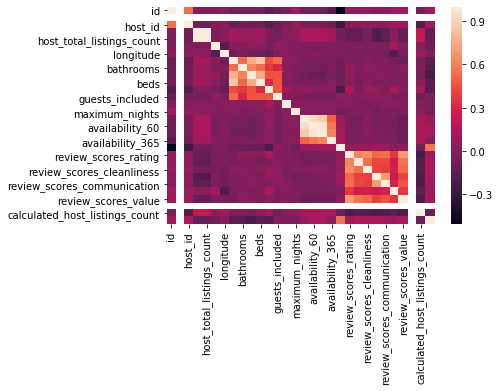

In [8]:
sns.heatmap(listings_df.corr());

It looks like some of these variables are highly correlated, mostly as we would expect -- for example, if one review score is high, the others are likely high as well (eg. rating, accuracy, cleanliness, checkin, communication, value); the location review is the least correlated to the others, which also makes sense. 

Likewise, availabilities are highly correlated (30, 60, 90, 365) as are the variables related to the house size (accomodates, bathrooms, bedrooms, beds, square feet). When determining predictor variables to use, we won't want to use all of the highly correlated values, but perhaps only one most representative value from each group. 

Let's look at a correlation matrix with a reduced number of variables, first let's find a list of the most highly correlated variables in a systematic way. Here I'm following steps from this 
https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [9]:
# Create correlation matrix
corr_matrix = listings_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['host_total_listings_count', 'availability_90']

Here we can see that we found the two most highly correlated features. Let's turn this into a function and test some different thresholds to see if we can get some of the other variables we saw that look like they have high correlations. Looking at the heatmap, let's try a correlation threshold of 0.8 to see what that gives us:

In [10]:
def find_correlated_features(df,threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop

In [11]:
corr_cols = find_correlated_features(listings_df,0.8)
print(corr_cols)

['host_total_listings_count', 'beds', 'availability_60', 'availability_90']


Ok, this gave us a few more. Let's loop through a number of different thresholds from 0.5 to 0.9 and list the correlated columns for each threshold. We can then select the set that looks the best, upon comparison:

In [12]:
thresholds = [0.5,0.6,0.7,0.8,0.9]
for t in thresholds:
    cols = find_correlated_features(listings_df,t)
    print(str(t) + ':' + ','.join(cols))

0.5:host_id,host_total_listings_count,bathrooms,bedrooms,beds,guests_included,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month
0.6:host_total_listings_count,bedrooms,beds,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_value
0.7:host_total_listings_count,bedrooms,beds,availability_60,availability_90
0.8:host_total_listings_count,beds,availability_60,availability_90
0.9:host_total_listings_count,availability_60,availability_90


In [13]:
# Drop features with > 50% correlation
cols_to_drop = find_correlated_features(listings_df,0.5)
listings_df2 = listings_df.copy().drop(listings_df[cols_to_drop], axis=1)

In [14]:
listings_df2.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_rating,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,95.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,2
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,96.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,97.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2


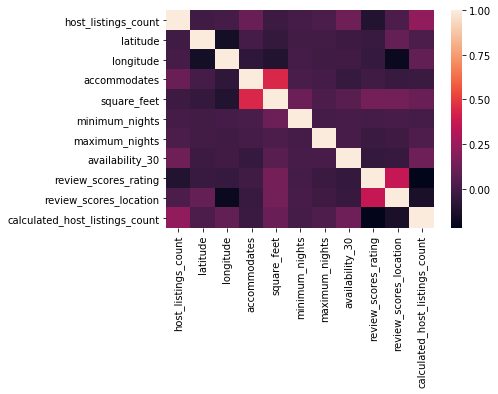

In [15]:
listings_df2 = listings_df2.drop(labels=['id','scrape_id','license'],axis=1)
sns.heatmap(listings_df2.corr());

C:\Users\bhass\AppData\Local\Continuum\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


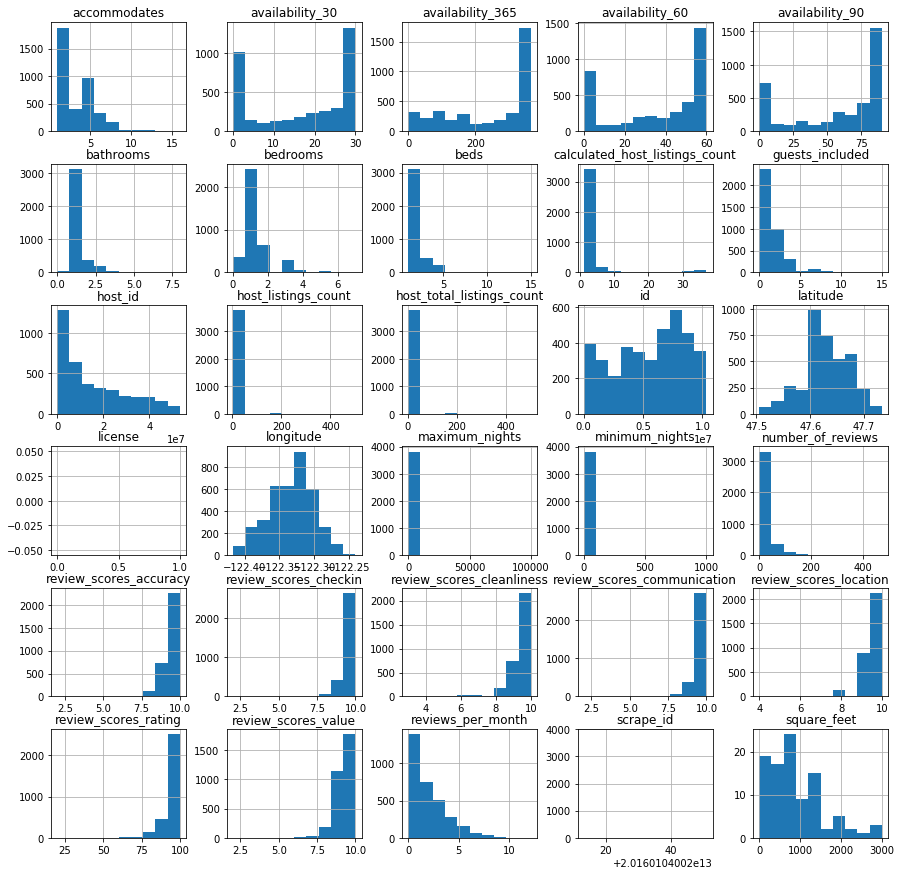

In [16]:
fig = plt.figure(figsize = (15,15))
listings_df.hist(ax = fig.gca());

In [17]:
most_missing_cols = set(listings_df.columns[listings_df.isnull().mean() > 0.5])
most_missing_cols

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

In [18]:
print(listings_df.shape)
print(listings_df.dropna(how='all',axis=1).shape)
listings_df['scrape_id'].describe()

(3818, 92)
(3818, 91)


count    3.818000e+03
mean     2.016010e+13
std      0.000000e+00
min      2.016010e+13
25%      2.016010e+13
50%      2.016010e+13
75%      2.016010e+13
max      2.016010e+13
Name: scrape_id, dtype: float64

In [19]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [20]:
listings_df['neighbourhood'].unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

In [21]:
listings_df['neighbourhood'].value_counts().head()

Capitol Hill    351
Ballard         213
Belltown        204
Minor           192
Queen Anne      187
Name: neighbourhood, dtype: int64

From this initial look at the dataset, some questions to consider include:

    1) do review scores vary significantly between different neighborhoods?
    2) which neighborhoods provide the best value (ratings/price ratio)?
    3) if we control for the review_score_location, does the neighborhood rating change?
    4) which variables are best predictors for the overall review score `review_score_rating`?

In [22]:
hood_ratings = listings_df.copy().groupby('neighbourhood').agg(['mean','count'])
hood_ratings = hood_ratings[['latitude','longitude','review_scores_rating','review_scores_location','review_scores_cleanliness']].reset_index()
hood_ratings.head()

neighbourhood   latitude         longitude       review_scores_rating  \
                       mean count        mean count                 mean   
0           Alki  47.571967    23 -122.408159    23            95.933333   
1  Arbor Heights  47.510145     3 -122.381473     3            98.000000   
2       Atlantic  47.594896    50 -122.304818    50            95.325581   
3        Ballard  47.674617   213 -122.379902   213            95.382514   
4       Belltown  47.615125   204 -122.345542   204            93.340659   

        review_scores_location       review_scores_cleanliness        
  count                   mean count                      mean count  
0    15               9.866667    15                  9.733333    15  
1     3               8.666667     3                  9.666667     3  
2    43               9.093023    43                  9.627907    43  
3   183               9.759563   183                  9.666667   183  
4   182               9.807692   182                  9.543956   182

In [23]:
hood_ratings.sort_values([('review_scores_rating','mean')],ascending=False).head()

neighbourhood   latitude         longitude        \
                                mean count        mean count   
1           Arbor Heights  47.510145     3 -122.381473     3   
28             High Point  47.543580    11 -122.369897    11   
79             Windermere  47.670713    10 -122.271895    10   
80         Yesler Terrace  47.604342    12 -122.320176    12   
27  Harrison/Denny-Blaine  47.622449    13 -122.291347    13   

   review_scores_rating       review_scores_location        \
                   mean count                   mean count   
1             98.000000     3               8.666667     3   
28            97.750000     8               9.500000     8   
79            97.500000     8               9.857143     7   
80            97.454545    11               9.545455    11   
27            97.181818    11               9.727273    11   

   review_scores_cleanliness        
                        mean count  
1                   9.666667     3  
28                 10.000000     8  
79                  9.571429     7  
80                  9.363636    11  
27                  9.727273    11

In [24]:
hood_ratings.sort_values([('review_scores_location','mean')],ascending=False).head()

neighbourhood   latitude         longitude        \
                                    mean count        mean count   
54                Pike Market  47.607060     2 -122.340955     2   
64                    Roxhill  47.528169     1 -122.376347     1   
21                   Gatewood  47.537877    18 -122.385525    18   
12  Central Business District  47.609159    81 -122.335423    81   
24                 Green Lake  47.679098    52 -122.330885    52   

   review_scores_rating       review_scores_location        \
                   mean count                   mean count   
54            95.000000     2              10.000000     2   
64            90.000000     1              10.000000     1   
21            96.769231    13               9.923077    13   
12            94.478873    71               9.915493    71   
24            95.952381    42               9.904762    42   

   review_scores_cleanliness        
                        mean count  
54                  9.000000     2  
64                 10.000000     1  
21                  9.846154    13  
12                  9.661972    71  
24                  9.547619    42

In [25]:
hood_ratings.sort_values([('review_scores_rating','mean')],ascending=False).tail()

neighbourhood   latitude         longitude        \
                              mean count        mean count   
70           South Park  47.523924     2 -122.322396     2   
73  University District  47.662569   107 -122.314040   107   
56            Pinehurst  47.712182     3 -122.319898     3   
17       Fairmount Park  47.550024     1 -122.381231     1   
50   North College Park  47.704953     1 -122.343314     1   

   review_scores_rating       review_scores_location        \
                   mean count                   mean count   
70            88.000000     1               8.000000     1   
73            87.619048    84               9.192771    83   
56            85.666667     3               8.000000     3   
17                  NaN     0                    NaN     0   
50                  NaN     0                    NaN     0   

   review_scores_cleanliness        
                        mean count  
70                       9.0     1  
73                       9.0    83  
56                      10.0     3  
17                       NaN     0  
50                       NaN     0

In [26]:
print(np.min(hood_ratings[('review_scores_rating','count')].values))
print(np.max(hood_ratings[('review_scores_rating','count')].values))
print(np.mean(hood_ratings[('review_scores_rating','count')].values))

0
286
35.382716049382715


In [27]:
print(np.round(listings_df['latitude'].mean(),3))
print(np.round(listings_df['longitude'].mean(),3))

47.629
-122.333


Let's look at a map, so we can more easily visualize whether we can see trends related to neighborhood:

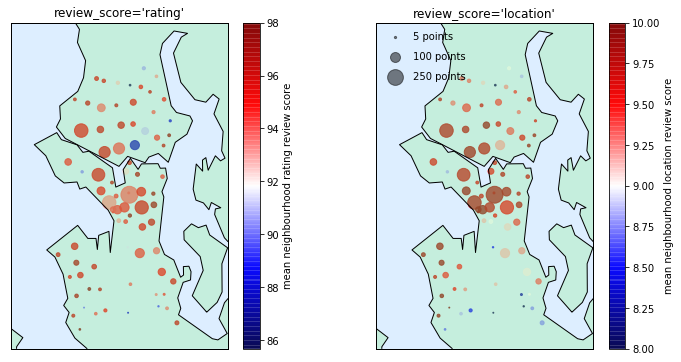

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i, review_score in enumerate(['rating', 'location']):
    m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
                width=20000, height=30000, resolution='h',ax=ax[i]);
    m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.3);
    m.drawmapboundary(fill_color="#DDEEFF");
    m.drawcoastlines();

    # Extract the data we're interested in
    lats = hood_ratings[('latitude','mean')].values
    lons = hood_ratings[('longitude','mean')].values
    mean_ratings = hood_ratings[('review_scores_'+review_score,'mean')].values
    count = hood_ratings[('review_scores_rating','count')].values

    # scatter airbnb data, with color reflecting rating [and size reflecting # of points]
    scatter = m.scatter(lons, lats, latlon=True, c=mean_ratings, s=count, cmap='seismic', alpha=0.8)
    
    # create colorbar
    plt.colorbar(scatter,ax=ax[i],label='mean neighbourhood '+review_score+ ' review score') 
#     plt.clim(np.nanmin(mean_ratings),np.nanmax(mean_ratings))
    ax[i].set_title("review_score='{0}'".format(review_score));
    
    # make legend with dummy points
for a in [5, 100, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' points')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, loc='upper left');

From these map, we can gather a few things:
    1. in general the mean score is fairly high (>85), and most neighbhorhoods score above 92/100 in overall rating, and > 9/10 in location. This could be because all the AirBnBs are fairly good, or because people tend to leave more positive ratings, or any number of other reasons. 
    2. there are more data points near the center of Seattle, and may not be sufficient data points on the outskirts of Seattle to make any definitive conclusions
    3. There are a few neighborhoods with a large number of datapoints that have a lower overall rating, a few centrally located and with a good location score. For example, some large ones that stand out are in the University district 
    
Now let's look at the `review_scores_location` data to see if this matches what we'd expect ... 

Let's pull in a map of the neighborhoods for reference:

<img src="seattle-hoods.jpg" style="width: 400px;">

Source: https://www.remaxonmarket.com/search-seattle-homes-by-neighborhood/

Next we can look at the normalized `review_score_rating` compared to the normalized `review_score_location` to give us an idea of which neighborhood has the best value.

Let's consider a simple normalization to be neighborhood mean / total mean. We can then look at the difference between the two (use ratio / other metric instead of difference?)

In [29]:
all_ratings_mean = np.nanmean(listings_df['review_scores_rating'].values)
all_loc_mean = np.nanmean(listings_df['review_scores_location'].values)
print(np.round(all_ratings_mean,2))
print(np.round(all_loc_mean,2))

94.54
9.61


In [30]:
hood_ratings['rating_norm_mean'] = hood_ratings[('review_scores_rating','mean')]/all_ratings_mean - 1
hood_ratings['loc_norm_mean'] = hood_ratings[('review_scores_location','mean')]/all_loc_mean - 1
hood_ratings['rating_loc_diff'] = hood_ratings['rating_norm_mean'] - hood_ratings['loc_norm_mean']
hood_ratings[['neighbourhood','rating_norm_mean','loc_norm_mean','rating_loc_diff']].style.bar(subset=['rating_loc_diff'], align='mid', color=['#d65f5f', '#5fba7d'])

,neighbourhood,rating_norm_mean,loc_norm_mean,rating_loc_diff
,,,,
0,Alki,0.014746,0.0268242,-0.0120782
1,Arbor Heights,0.0366064,-0.0980599,0.134666
2,Atlantic,0.00831738,-0.0536889,0.0620063
3,Ballard,0.00891959,0.0156779,-0.00675827
4,Belltown,-0.0126784,0.0206867,-0.0333651
5,Bitter Lake,0.0119253,-0.0286798,0.0406051
6,Brighton,-0.000415299,-0.0633699,0.0629546
7,Broadview,0.0112201,-0.0286798,0.0398999
8,Broadway,-0.0030597,-0.0113348,0.00827514


Let's take a look at the subset of the data, only considering entries where there are at least 25 reviews, so that the mean is likely more representative of "truth":

In [31]:
hood_ratings_subset = hood_ratings[hood_ratings[('review_scores_rating','count')]>25].reset_index()
hood_ratings_subset[['neighbourhood','rating_norm_mean','loc_norm_mean','rating_loc_diff']].head(25).style.bar(subset=['rating_loc_diff'], align='mid', color=['#d65f5f', '#5fba7d'])

,neighbourhood,rating_norm_mean,loc_norm_mean,rating_loc_diff
,,,,
0,Atlantic,0.00831738,-0.0536889,0.0620063
1,Ballard,0.00891959,0.0156779,-0.00675827
2,Belltown,-0.0126784,0.0206867,-0.0333651
3,Bryant,-0.000611181,-0.00169873,0.00108755
4,Capitol Hill,-0.00648079,0.0250533,-0.0315341
5,Central Business District,-0.00063877,0.0319055,-0.0325443
6,Columbia City,0.0038941,-0.0595154,0.0634095
7,Eastlake,-0.0238372,-0.0068747,-0.0169625
8,First Hill,0.0011473,0.0135,-0.0123527


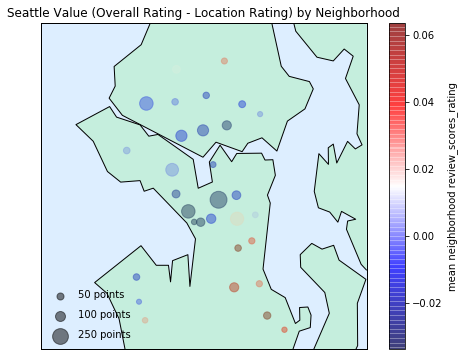

In [32]:
fig = plt.figure(figsize=(8, 6))
m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
            width=20000, height=20000, resolution='h');
m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.3);
m.drawmapboundary(fill_color="#DDEEFF");
m.drawcoastlines();

# Extract the data we're interested in
lats = hood_ratings_subset[('latitude','mean')].values
lons = hood_ratings_subset[('longitude','mean')].values
mean_rating_diff = hood_ratings_subset['rating_loc_diff'].values
count = hood_ratings_subset[('review_scores_rating','count')].values

# scatter airbnb data, with color reflecting rating [and size reflecting # of points]
m.scatter(lons, lats, latlon=True,
          c=mean_rating_diff, s=count,
          cmap='seismic', alpha=0.5)

# create colorbar and legend
plt.colorbar(label='mean neighborhood review_scores_rating')

# make legend with dummy points
for a in [50, 100, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' points')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, loc='lower left');
plt.gca().set_title("Seattle Value (Overall Rating - Location Rating) by Neighborhood");

We can see that this graph gives us a slightly better picture of the areas with higher "values". Red indicates that the normalized rating score - normalized location score is positive, i.e. although the location wasn't that desirable, the place was generally a nice stay. We can see that areas closer to central downtown are perhaps a worse value, but that more people tended to stay in these areas anyway, likely due to the convenience and desirability of the location. The worst values look to be the University District, South Lake, and Lower Queen Anne.

This is pretty much in line with what we would expect; if we looked at a price/square foot it would likely follow this pattern, because **Location, Location, Location**.

In [33]:
hood_loc_ratings = listings_df.copy().groupby('neighbourhood').agg(['mean','count'])
hood_loc_ratings = hood_ratings[['neighbourhood','latitude','longitude','review_scores_location']].reset_index()
hood_loc_ratings.head()

index  neighbourhood   latitude         longitude        \
                             mean count        mean count   
0     0           Alki  47.571967    23 -122.408159    23   
1     1  Arbor Heights  47.510145     3 -122.381473     3   
2     2       Atlantic  47.594896    50 -122.304818    50   
3     3        Ballard  47.674617   213 -122.379902   213   
4     4       Belltown  47.615125   204 -122.345542   204   

  review_scores_location        
                    mean count  
0               9.866667    15  
1               8.666667     3  
2               9.093023    43  
3               9.759563   183  
4               9.807692   182

Medium Blog Headline Ideas:
- Are Hippies Really Dirty? And other stereotypes we can test (questions we can answer) from Seattle AirBnB data.
https://www.hipplanet.com/hip/hippie-havens/seattle-washington/
https://www.yelp.com/topic/seattle-where-my-hippies-at
While there's a lot of advice suggesting hippies have left Seattle for Portland OR or Boulder CO, if stuck in Seattle, the hippy neighborhoods appear to be Fremont or Ballard.
    - *"If you're stuck on Seattle, go to Freemont or Ballard."*
    - *"Portland. The hippies have all been exiled to Portland."*
    - *"You want hippies?  Honest-to-God hippies?  Go to Boulder, CO.  That is their Mecca."*
    - *"Fremont used to be a hippie-ish enclave in Seattle, and still retains some vestiges thereof, but is in actuality all but lost to gentrification with half million dollar townhouses going up constantly along the roads leading to the main drag."*

- `review_scores_cleanliness` v. location

Let's look at the top 5 neighborhoods with the cleanest and dirtiest ratings:

In [34]:
hood_ratings.sort_values([('review_scores_cleanliness','mean')],ascending=False).tail(5)

neighbourhood   latitude         longitude        \
                             mean count        mean count   
67   South Beacon Hill  47.529232     2 -122.285153     2   
54         Pike Market  47.607060     2 -122.340955     2   
75          View Ridge  47.682680     6 -122.270556     6   
17      Fairmount Park  47.550024     1 -122.381231     1   
50  North College Park  47.704953     1 -122.343314     1   

   review_scores_rating       review_scores_location        \
                   mean count                   mean count   
67                 89.5     2                    8.0     2   
54                 95.0     2                   10.0     2   
75                 88.2     5                    9.6     5   
17                  NaN     0                    NaN     0   
50                  NaN     0                    NaN     0   

   review_scores_cleanliness       rating_norm_mean loc_norm_mean  \
                        mean count                                  
67                       9.0     2        -0.053303     -0.167440   
54                       9.0     2         0.004874      0.040700   
75                       8.8     5        -0.067054     -0.000928   
17                       NaN     0              NaN           NaN   
50                       NaN     0              NaN           NaN   

   rating_loc_diff  
                    
67        0.114136  
54       -0.035827  
75       -0.066126  
17             NaN  
50             NaN

In [35]:
hood_ratings.sort_values([('review_scores_cleanliness','mean')],ascending=False).head(10)

neighbourhood   latitude         longitude       review_scores_rating  \
                        mean count        mean count                 mean   
56      Pinehurst  47.712182     3 -122.319898     3            85.666667   
6        Brighton  47.539153     5 -122.278180     5            94.500000   
34    Laurelhurst  47.662209     9 -122.278754     9            96.375000   
62      Riverview  47.543262     8 -122.356807     8            96.375000   
28     High Point  47.543580    11 -122.369897    11            97.750000   
64        Roxhill  47.528169     1 -122.376347     1            90.000000   
53  Phinney Ridge  47.675533    56 -122.356374    56            95.953488   
18     Fauntleroy  47.521486    10 -122.389487    10            96.111111   
43    Meadowbrook  47.706630     9 -122.295389     9            96.142857   
21       Gatewood  47.537877    18 -122.385525    18            96.769231   

         review_scores_location       review_scores_cleanliness        \
   count                   mean count                      mean count   
56     3               8.000000     3                 10.000000     3   
6      4               9.000000     4                 10.000000     4   
34     8               9.875000     8                 10.000000     8   
62     8               9.250000     8                 10.000000     8   
28     8               9.500000     8                 10.000000     8   
64     1              10.000000     1                 10.000000     1   
53    43               9.767442    43                  9.906977    43   
18     9               9.888889     9                  9.888889     9   
43     7               9.428571     7                  9.857143     7   
21    13               9.923077    13                  9.846154    13   

   rating_norm_mean loc_norm_mean rating_loc_diff  
                                                   
56        -0.093851     -0.167440        0.073589  
6         -0.000415     -0.063370        0.062955  
34         0.019418      0.027691       -0.008274  
62         0.019418     -0.037352        0.056770  
28         0.033962     -0.011335        0.045297  
64        -0.048015      0.040700       -0.088715  
53         0.014959      0.016498       -0.001539  
18         0.016626      0.029137       -0.012510  
43         0.016962     -0.018768        0.035731  
21         0.023588      0.032695       -0.009107

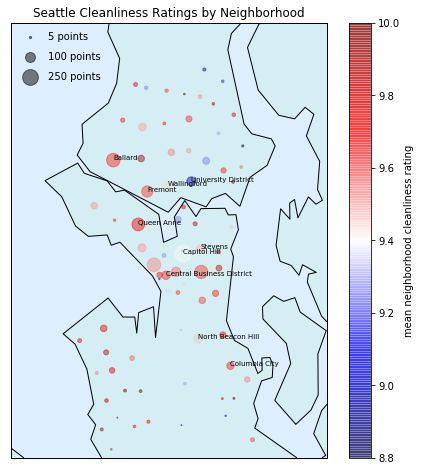

In [36]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
            width=20000, height=27500, resolution='h');
m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.1);
m.drawmapboundary(fill_color="#DDEEFF");
m.drawcoastlines();

# Extract the data we're interested in
lats = hood_ratings[('latitude','mean')].values
lons = hood_ratings[('longitude','mean')].values
hoods = hood_ratings['neighbourhood'].values
mean_clean_ratings = hood_ratings[('review_scores_cleanliness','mean')].values
count = hood_ratings[('review_scores_cleanliness','count')].values

# scatter airbnb data, with color reflecting rating [and size reflecting # of points]
m.scatter(lons, lats, latlon=True,
          c=mean_clean_ratings, s=count,
          cmap='seismic', alpha=0.5)

hood_ratings_high_count = hood_ratings[hood_ratings[('review_scores_cleanliness','count')]>50]

cleanest = hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=False).head(5)
dirtiest = hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=False).tail(5)

# ax.annotate('Ravenna',m(-122.301445,47.674228)) #can't seem to get ax.annotate to work :/
# plt.text(m(lon,lat)[0],m(lon,lat)[1],'neigbourhood')
# plt.text(m(-122.301445,47.674228)[0],m(-122.301445,47.674228)[1],'Ravenna')
for i, row in cleanest.iterrows():
    x = row[('longitude','mean')]
    y = row[('latitude','mean')]
    hood = row['neighbourhood'][0]
    plt.text(m(x,y)[0],m(x,y)[1],hood,fontsize=7)
    
for i, row in dirtiest.iterrows():
    x = row[('longitude','mean')]
    y = row[('latitude','mean')]
    hood = row['neighbourhood'][0]
    plt.text(m(x,y)[0],m(x,y)[1],hood,fontsize=7) 
         
# create colorbar and legend
plt.colorbar(label='mean neighborhood cleanliness rating')

# make legend with dummy points
for a in [5, 100, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' points')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, loc='upper left');
plt.gca().set_title("Seattle Cleanliness Ratings by Neighborhood");

In [37]:
hood_ratings_high_count = hood_ratings[hood_ratings[('review_scores_cleanliness','count')]>25]

In [38]:
hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=False).head(15)

neighbourhood   latitude         longitude        \
                                    mean count        mean count   
53              Phinney Ridge  47.675533    56 -122.356374    56   
22                    Genesee  47.565288    29 -122.385817    29   
39                    Madrona  47.613210    40 -122.290727    40   
47              North Admiral  47.578909    48 -122.387890    48   
72               The Junction  47.555040    36 -122.380833    36   
59                 Queen Anne  47.638069   187 -122.358780   187   
46                Mount Baker  47.575208    46 -122.287461    46   
55          Pike Place Market  47.609306    39 -122.340744    39   
9                      Bryant  47.668759    32 -122.286768    32   
13              Columbia City  47.557671    61 -122.281073    61   
35                     Leschi  47.598854    44 -122.293594    44   
3                     Ballard  47.674617   213 -122.379902   213   
12  Central Business District  47.609159    81 -122.335423    81   
41                 Maple Leaf  47.698055    41 -122.315995    41   
20                    Fremont  47.656810   148 -122.351196   148   

   review_scores_rating       review_scores_location        \
                   mean count                   mean count   
53            95.953488    43               9.767442    43   
22            96.846154    26               9.884615    26   
39            97.151515    33               9.787879    33   
47            95.581395    43               9.860465    43   
72            95.419355    31               9.451613    31   
59            95.582822   163               9.703704   162   
46            93.820513    39               9.230769    39   
55            94.225806    31               9.903226    31   
9             94.481481    27               9.592593    27   
13            94.907407    54               9.037037    54   
35            95.948718    39               9.410256    39   
3             95.382514   183               9.759563   183   
12            94.478873    71               9.915493    71   
41            95.405405    37               9.405405    37   
20            95.690476   126               9.841270   126   

   review_scores_cleanliness       rating_norm_mean loc_norm_mean  \
                        mean count                                  
53                  9.906977    43         0.014959      0.016498   
22                  9.807692    26         0.024401      0.028692   
39                  9.787879    33         0.027631      0.018625   
47                  9.744186    43         0.011023      0.026179   
72                  9.741935    31         0.009309     -0.016370   
59                  9.711656   163         0.011038      0.009865   
46                  9.692308    39        -0.007603     -0.039354   
55                  9.677419    31        -0.003316      0.030629   
9                   9.666667    27        -0.000611     -0.001699   
13                  9.666667    54         0.003894     -0.059515   
35                  9.666667    39         0.014909     -0.020674   
3                   9.666667   183         0.008920      0.015678   
12                  9.661972    71        -0.000639      0.031906   
41                  9.648649    37         0.009162     -0.021179   
20                  9.642857   126         0.012177      0.024181   

   rating_loc_diff  
                    
53       -0.001539  
22       -0.004291  
39        0.009007  
47       -0.015155  
72        0.025680  
59        0.001174  
46        0.031751  
55       -0.033944  
9         0.001088  
13        0.063410  
35        0.035583  
3        -0.006758  
12       -0.032544  
41        0.030341  
20       -0.012004

In [39]:
hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=True).head(15)

neighbourhood   latitude         longitude        \
                              mean count        mean count   
73  University District  47.662569   107 -122.314040   107   
61              Ravenna  47.674228    59 -122.301445    59   
16             Eastlake  47.640933    41 -122.325259    41   
10         Capitol Hill  47.621535   351 -122.320792   351   
76          Wallingford  47.659809   143 -122.333501   143   
49    North Beacon Hill  47.573244    95 -122.308032    95   
71              Stevens  47.624053    98 -122.306159    98   
25            Greenwood  47.693461    79 -122.355271    79   
40             Magnolia  47.648660    55 -122.395953    55   
37     Lower Queen Anne  47.624742    83 -122.355568    83   
4              Belltown  47.615125   204 -122.345542   204   
24           Green Lake  47.679098    52 -122.330885    52   
66          Seward Park  47.549844    32 -122.266961    32   
19           First Hill  47.611091   105 -122.326830   105   
2              Atlantic  47.594896    50 -122.304818    50   

   review_scores_rating       review_scores_location        \
                   mean count                   mean count   
73            87.619048    84               9.192771    83   
61            91.125000    48               9.361702    47   
16            92.285714    35               9.542857    35   
10            93.926573   286               9.849650   286   
76            94.168000   125               9.744000   125   
49            94.488095    84               9.142857    84   
71            95.131579    76               9.815789    76   
25            93.803279    61               9.406780    59   
40            94.590909    44               9.590909    44   
37            95.095238    63               9.888889    63   
4             93.340659   182               9.807692   182   
24            95.952381    42               9.904762    42   
66            95.586207    29               9.344828    29   
19            94.647727    88               9.738636    88   
2             95.325581    43               9.093023    43   

   review_scores_cleanliness       rating_norm_mean loc_norm_mean  \
                        mean count                                  
73                  9.000000    83        -0.073199     -0.043308   
61                  9.250000    48        -0.036115     -0.025728   
16                  9.257143    35        -0.023837     -0.006875   
10                  9.398601   286        -0.006481      0.025053   
76                  9.440000   125        -0.003927      0.014058   
49                  9.464286    84        -0.000541     -0.048503   
71                  9.480000    75         0.006265      0.021529   
25                  9.508475    59        -0.007785     -0.021036   
40                  9.522727    44         0.000546     -0.001874   
37                  9.523810    63         0.005881      0.029137   
4                   9.543956   182        -0.012678      0.020687   
24                  9.547619    42         0.014947      0.030789   
66                  9.551724    29         0.011074     -0.027484   
19                  9.579545    88         0.001147      0.013500   
2                   9.627907    43         0.008317     -0.053689   

   rating_loc_diff  
                    
73       -0.029891  
61       -0.010387  
16       -0.016962  
10       -0.031534  
76       -0.017985  
49        0.047961  
71       -0.015264  
25        0.013251  
40        0.002420  
37       -0.023256  
4        -0.033365  
24       -0.015841  
66        0.038558  
19       -0.012353  
2         0.062006

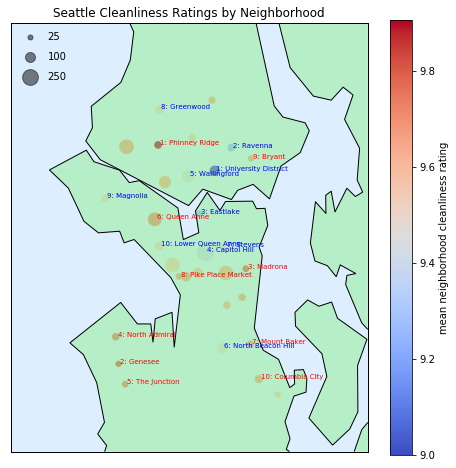

In [40]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
            width=20000, height=24000, resolution='h');
m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.5);
m.drawmapboundary(fill_color="#DDEEFF");
m.drawcoastlines();

# Extract the data we're interested in
lats = hood_ratings_high_count[('latitude','mean')].values
lons = hood_ratings_high_count[('longitude','mean')].values
hoods = hood_ratings_high_count['neighbourhood'].values
mean_clean_ratings = hood_ratings_high_count[('review_scores_cleanliness','mean')].values
count = hood_ratings_high_count[('review_scores_cleanliness','count')].values

# scatter airbnb data, with color reflecting rating [and size reflecting # of points]
m.scatter(lons, lats, latlon=True,
          c=mean_clean_ratings, s=count,
          cmap='coolwarm', alpha=1)

cleanest = hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=False).reset_index().head(10)
dirtiest = hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=False).reset_index().tail(10)

# add labels for the 5 cleanest and dirtiest neighborhoods (only using neighborhoods with > 50 data points)
k = 1
for i, row in cleanest.iterrows():
    x = row[('longitude','mean')]
    y = row[('latitude','mean')]
    hood = row['neighbourhood'][0]
    plt.text(m(x,y)[0]+100,m(x,y)[1],str(k)+': '+hood,fontsize=7,color='r')
    k+=1

k=1
for i, row in dirtiest.iterrows():
    x = row[('longitude','mean')]
    y = row[('latitude','mean')]
    hood = row['neighbourhood'][0]
    plt.text(m(x,y)[0]+100,m(x,y)[1],str(11-k)+': '+hood,fontsize=7,color='b') 
    k+=1
         
# create colorbar and legend
plt.colorbar(label='mean neighborhood cleanliness rating')

# make legend with dummy points
for a in [25, 100, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a))
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, loc='upper left');
plt.gca().set_title("Seattle Cleanliness Ratings by Neighborhood");

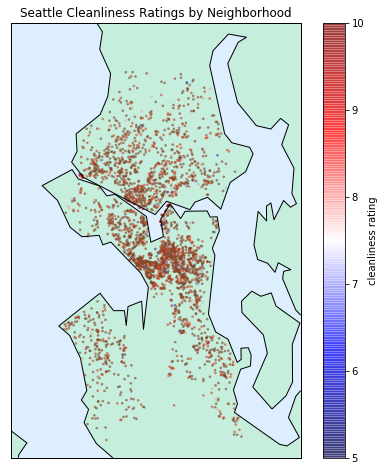

In [41]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
            width=20000, height=30000, resolution='h');
m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.3);
m.drawmapboundary(fill_color="#DDEEFF");
m.drawcoastlines();

# Extract the data we're interested in
lats = listings_df['latitude'].values
lons = listings_df['longitude'].values
clean_ratings = listings_df['review_scores_cleanliness'].values

# scatter airbnb data, with color reflecting rating 
m.scatter(lons, lats, latlon=True,c=clean_ratings,s=3,cmap='seismic', alpha=0.5)

# create colorbar and legend
plt.colorbar(label='cleanliness rating')
plt.clim([5,10])

plt.gca().set_title("Seattle Cleanliness Ratings by Neighborhood");

It does look like the Fremont and Ballard are being gentrified, if you use cleanliness as a proxy for non-hippiness ... we can also use another metric [stereotype] to approximate hippiness -- communal living. Let's look at the relationship between neighborhood and the house type - full house v. private room v. shared room (if enough data points) ... 

In [42]:
listings_df['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [43]:
listings_df['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [44]:
listings_df['room_type'].value_counts(normalize=True)

Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64

The `pandas.crosstab` method is a handy way to look at the frequency of different categories grouped by another. Let's look at our how room types are represented in each neighborhood: 

In [45]:
pd.crosstab(listings_df['neighbourhood'],listings_df['room_type'])

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Alki,19,4,0
Arbor Heights,2,1,0
Atlantic,34,16,0
Ballard,138,75,0
Belltown,192,9,3
Bitter Lake,4,9,0
Brighton,3,1,1
Broadview,10,6,0
Broadway,4,1,0


We can use a `lambda` function to turn these into fractions:

In [46]:
hood_roomtypes = pd.crosstab(listings_df['neighbourhood'],listings_df['room_type']).apply(lambda r: r/r.sum(), axis=1)
hood_roomtypes.head(3)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Alki,0.826087,0.173913,0.0
Arbor Heights,0.666667,0.333333,0.0
Atlantic,0.680000,0.320000,0.0


In [47]:
hood_roomtypes.sort_values([('Entire home/apt')],ascending=False).head(10)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Pinehurst,1.000000,0.000000,0.000000
Fairmount Park,1.000000,0.000000,0.000000
South Park,1.000000,0.000000,0.000000
North College Park,1.000000,0.000000,0.000000
South Beacon Hill,1.000000,0.000000,0.000000
Pike Market,1.000000,0.000000,0.000000
Belltown,0.941176,0.044118,0.014706
Central Business District,0.925926,0.049383,0.024691
Pike Place Market,0.897436,0.051282,0.051282


In [48]:
hood_roomtypes.sort_values([('Private room')],ascending=False).head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Roxhill,0.000000,1.000000,0.0
High Point,0.090909,0.909091,0.0
Georgetown,0.142857,0.857143,0.0
Rainier Beach,0.166667,0.833333,0.0
Holly Park,0.166667,0.833333,0.0


In [49]:
hood_roomtypes.sort_values([('Shared room')],ascending=False).head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Brighton,0.600000,0.200000,0.200000
Dunlap,0.307692,0.538462,0.153846
Stevens,0.510204,0.346939,0.142857
Pioneer Square,0.714286,0.142857,0.142857
International District,0.529412,0.352941,0.117647


Text(195.0, 0.5, 'room type')

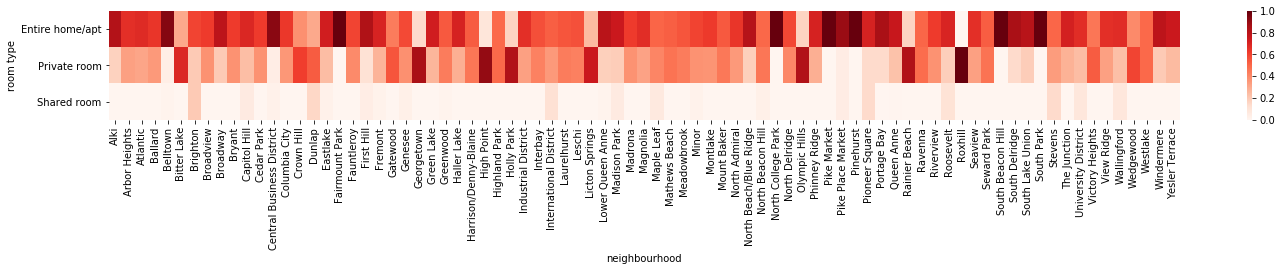

In [50]:
fig, ax = plt.subplots(figsize=(24,2))  
sns.heatmap(hood_roomtypes.transpose(), cmap="Reds",ax=ax);
ax.set_ylabel('room type')

In [51]:
hood_latlon = listings_df[['neighbourhood','latitude','longitude']].groupby('neighbourhood').mean()
hood_latlon.head(3)

,latitude,longitude
neighbourhood,,
Alki,47.571967,-122.408159
Arbor Heights,47.510145,-122.381473
Atlantic,47.594896,-122.304818


In [52]:
hood_roomtypes_latlon = hood_roomtypes.merge(hood_latlon,left_index=True,right_on='neighbourhood')
hood_roomtypes_latlon.head(3)

,Entire home/apt,Private room,Shared room,latitude,longitude
neighbourhood,,,,,
Alki,0.826087,0.173913,0.0,47.571967,-122.408159
Arbor Heights,0.666667,0.333333,0.0,47.510145,-122.381473
Atlantic,0.680000,0.320000,0.0,47.594896,-122.304818


In [53]:
hood_roomtypes_latlon['count'] = pd.crosstab(listings_df['neighbourhood'],listings_df['room_type']).apply(lambda r: r.sum(), axis=1)
hood_roomtypes_latlon.head(3)

,Entire home/apt,Private room,Shared room,latitude,longitude,count
neighbourhood,,,,,,
Alki,0.826087,0.173913,0.0,47.571967,-122.408159,23
Arbor Heights,0.666667,0.333333,0.0,47.510145,-122.381473,3
Atlantic,0.680000,0.320000,0.0,47.594896,-122.304818,50


In [54]:
hood_roomtypes2 = hood_roomtypes_latlon[hood_roomtypes_latlon['count']>4]

In [55]:
most_communal = hood_roomtypes2.sort_values([('Shared room')],ascending=False).head(10)
most_communal[['Shared room','count']]

,Shared room,count
neighbourhood,,
Brighton,0.200000,5
Dunlap,0.153846,13
Pioneer Square,0.142857,14
Stevens,0.142857,98
International District,0.117647,17
Roosevelt,0.111111,27
University District,0.084112,107
Wallingford,0.083916,143
Maple Leaf,0.073171,41


In [56]:
mid_communal = hood_roomtypes2.sort_values([('Private room')],ascending=False).head(10)
mid_communal[['Private room','count']]

,Private room,count
neighbourhood,,
High Point,0.909091,11
Georgetown,0.857143,7
Olympic Hills,0.833333,12
Holly Park,0.833333,6
Rainier Beach,0.833333,18
Licton Springs,0.750000,12
Bitter Lake,0.692308,13
Crown Hill,0.619048,21
Wedgewood,0.600000,15


In [57]:
least_communal = hood_roomtypes2.sort_values([('Entire home/apt')],ascending=False).head(10)
least_communal[['Entire home/apt','count']]

,Entire home/apt,count
neighbourhood,,
Belltown,0.941176,204
Central Business District,0.925926,81
Pike Place Market,0.897436,39
South Delridge,0.857143,7
Portage Bay,0.857143,14
First Hill,0.838095,105
Alki,0.826087,23
North Beach/Blue Ridge,0.818182,11
South Lake Union,0.809524,21


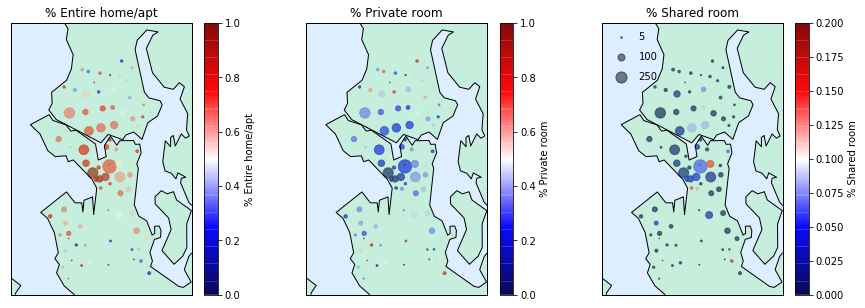

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, room_type in enumerate(['Entire home/apt', 'Private room', 'Shared room']):
    m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
                width=20000, height=30000, resolution='h',ax=ax[i]);
    m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.3);
    m.drawmapboundary(fill_color="#DDEEFF");
    m.drawcoastlines();

    # Extract the data we're interested in
    lats = hood_roomtypes_latlon['latitude'].values
    lons = hood_roomtypes_latlon['longitude'].values
    mean_ratings = hood_roomtypes_latlon[room_type].values
    count = hood_roomtypes_latlon['count'].values

    # scatter airbnb data, with color reflecting rating [and size reflecting # of points]
    scatter = m.scatter(lons, lats, latlon=True, c=mean_ratings, s=count/2, cmap='seismic', alpha=0.8)
    
    # create colorbar
    plt.colorbar(scatter,ax=ax[i],label='% '+ room_type) 
    ax[i].set_title('% ' + room_type);
    
    # make legend with dummy points
for a in [5, 100, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=a/2, label=str(a))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left');

In [ ]:
## ALSO LOOK AT NEIGHBOURHOOD_CLEANSED AND NEIGHBOURHOOD_GROUP_CLEANSED